In [1]:
import base64
import requests
import json
from config import sportskey
from config import password
from config import gkey
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os
from ohmysportsfeedspy import MySportsFeeds
import gmaps

msf = MySportsFeeds(version="2.0")
msf.authenticate(sportskey, "MYSPORTSFEEDS")


In [2]:
# retreives data from API
output = msf.msf_get_data(league='nba',season='2018-2019-regular',feed='seasonal_player_stats',format='json')


In [3]:
# records amount of records/players
num_records = len(output["playerStatsTotals"])


In [4]:
# creates empty df
stats_df = pd.DataFrame(columns=['Name', 'Age', 'Birth City', 'Birth Country', 'Birth Lat', 'Birth Lng', 'College', 'College Lat', 'College Lng', 'Height (in)', 'Points/Game', 'Assists/Game', 'Steals/Game', 'Rebounds/Game', 'Blocks/Game', 'Ability Score'], index = np.arange(num_records))
stats_df


,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# test
output["playerStatsTotals"][2]["player"]

{'id': 15312,
 'firstName': 'Jaylen',
 'lastName': 'Adams',
 'primaryPosition': 'SG',
 'jerseyNumber': 10,
 'currentTeam': {'id': 90, 'abbreviation': 'MIL'},
 'currentRosterStatus': 'ASSIGNED_TO_MINORS',
 'currentInjury': None,
 'height': '6\'0"',
 'weight': 225,
 'birthDate': '1996-05-04',
 'age': 23,
 'birthCity': 'Elkridge, MD',
 'birthCountry': 'USA',
 'rookie': False,
 'highSchool': None,
 'college': None,
 'handedness': {'shoots': None},
 'officialImageSrc': 'https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/1629121.png',
 'socialMediaAccounts': []}

In [6]:
# loops through each row of empty df and adds appropriate stat to each column for each player
# ability score is what we decided best indicates player ability
# ability score = points per game + rebounds per game + assists per game + steals per game + blocks per game 
for x in range(num_records):
    stats_df.loc[x, 'Name'] = output["playerStatsTotals"][x]["player"]["firstName"] + " " + output["playerStatsTotals"][x]["player"]["lastName"]
    stats_df.loc[x, 'Age'] = output["playerStatsTotals"][x]["player"]["age"]
    stats_df.loc[x, 'Birth City'] = output["playerStatsTotals"][x]["player"]["birthCity"]
    stats_df.loc[x, 'Birth Country'] = output["playerStatsTotals"][x]["player"]["birthCountry"]
    stats_df.loc[x, 'College'] = output["playerStatsTotals"][x]["player"]["college"]
    stats_df.loc[x, 'Height (in)'] = output["playerStatsTotals"][x]["player"]["height"]
    stats_df.loc[x, 'Points/Game'] = output["playerStatsTotals"][x]["stats"]["offense"]["ptsPerGame"]
    stats_df.loc[x, 'Assists/Game'] = output["playerStatsTotals"][x]["stats"]["offense"]["astPerGame"]
    stats_df.loc[x, 'Rebounds/Game'] = output["playerStatsTotals"][x]["stats"]["rebounds"]["rebPerGame"]
    stats_df.loc[x, 'Blocks/Game'] = output["playerStatsTotals"][x]["stats"]["defense"]["blkPerGame"]
    stats_df.loc[x, 'Steals/Game'] = output["playerStatsTotals"][x]["stats"]["defense"]["stlPerGame"]
    stats_df.loc[x, 'Ability Score'] = output["playerStatsTotals"][x]["stats"]["rebounds"]["rebPerGame"] + output["playerStatsTotals"][x]["stats"]["offense"]["ptsPerGame"] + output["playerStatsTotals"][x]["stats"]["offense"]["astPerGame"] + output["playerStatsTotals"][x]["stats"]["defense"]["stlPerGame"] + output["playerStatsTotals"][x]["stats"]["defense"]["blkPerGame"]        

stats_df


,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,Alex Abrines,26,Palma de Mallorca,Spain,NaN,NaN,None,NaN,NaN,"6'6""",5.3,0.6,0.5,1.5,0.2,8.1
1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,NaN,NaN,"6'7""",1.7,0.8,0.1,2.5,0.4,5.5
2,Jaylen Adams,23,"Elkridge, MD",USA,NaN,NaN,None,NaN,NaN,"6'0""",3.2,1.9,0.4,1.8,0.1,7.4
3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,NaN,NaN,"6'11""",13.8,1.6,1.5,9.5,1,27.4
4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,NaN,NaN,"6'9""",8.9,2.2,0.9,7.3,0.8,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Nate Wolters,28,"St. Cloud, MN",USA,NaN,NaN,South Dakota State University,NaN,NaN,None,0,0,0,0,0,0
877,Kenny Wooten,22,"Manteca, CA",USA,NaN,NaN,Oregon,NaN,NaN,"6'8""",0,0,0,0,0,0
878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,NaN,NaN,"6'10""",0,0,0,0,0,0
879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,NaN,NaN,"6'0""",0,0,0,0,0,0


In [7]:
# groups by age
age_count = stats_df["Age"].value_counts()
age_count
# turns series into df
age_count = age_count.to_frame()
# resets index so age is a column
age_count = age_count.reset_index()
# renames columns
age_count = age_count.rename(columns={"index":"Age", "Age":"Number of Players of that Age"})
age_count
# sorts by age
age_count = age_count.sort_values("Age")
age_count


,Age,Number of Players of that Age
15,2,17
17,19,9
12,20,26
8,21,42
5,22,68
1,23,96
0,24,98
3,25,77
4,26,71
2,27,77


In [8]:
# removes rows where age was 2
age_count = age_count.loc[age_count["Age"] > 2]
age_count


,Age,Number of Players of that Age
17,19,9
12,20,26
8,21,42
5,22,68
1,23,96
0,24,98
3,25,77
4,26,71
2,27,77
7,28,50


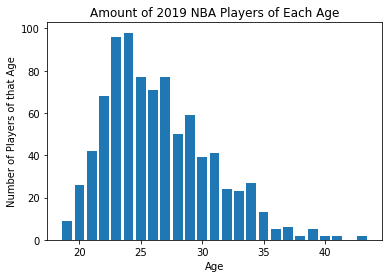

In [9]:
# plots and saves bar graph of how many players there are of each age
plt.bar(age_count["Age"], age_count["Number of Players of that Age"])
plt.xlabel('Age')
plt.ylabel('Number of Players of that Age')
plt.title("Amount of 2019 NBA Players of Each Age")
plt.savefig("Figures/num ages 2019 nba.png")


In [10]:
# removes any rows where height is NaN
height_df = stats_df[stats_df['Height (in)'].notna()]
height_df
    

,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,Alex Abrines,26,Palma de Mallorca,Spain,NaN,NaN,None,NaN,NaN,"6'6""",5.3,0.6,0.5,1.5,0.2,8.1
1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,NaN,NaN,"6'7""",1.7,0.8,0.1,2.5,0.4,5.5
2,Jaylen Adams,23,"Elkridge, MD",USA,NaN,NaN,None,NaN,NaN,"6'0""",3.2,1.9,0.4,1.8,0.1,7.4
3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,NaN,NaN,"6'11""",13.8,1.6,1.5,9.5,1,27.4
4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,NaN,NaN,"6'9""",8.9,2.2,0.9,7.3,0.8,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,Todd Withers,23,"Greensboro, NC",USA,NaN,NaN,Queens University,NaN,NaN,"6'7""",0,0,0,0,0,0
877,Kenny Wooten,22,"Manteca, CA",USA,NaN,NaN,Oregon,NaN,NaN,"6'8""",0,0,0,0,0,0
878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,NaN,NaN,"6'10""",0,0,0,0,0,0
879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,NaN,NaN,"6'0""",0,0,0,0,0,0


In [11]:
# loops through every row and changes the height from ft'in" to just inches
for index, row in height_df.iterrows():
    H_feet = height_df.loc[index, 'Height (in)'].split("'")[0]
    H_inch = height_df.loc[index, 'Height (in)'].split("'")[1].split("\"")[0]
    H_inches = int(H_feet) * 12 + int(H_inch)
    height_df.loc[index, 'Height (in)'] = H_inches

height_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,Alex Abrines,26,Palma de Mallorca,Spain,NaN,NaN,None,NaN,NaN,78,5.3,0.6,0.5,1.5,0.2,8.1
1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,NaN,NaN,79,1.7,0.8,0.1,2.5,0.4,5.5
2,Jaylen Adams,23,"Elkridge, MD",USA,NaN,NaN,None,NaN,NaN,72,3.2,1.9,0.4,1.8,0.1,7.4
3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,NaN,NaN,83,13.8,1.6,1.5,9.5,1,27.4
4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,NaN,NaN,81,8.9,2.2,0.9,7.3,0.8,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,Todd Withers,23,"Greensboro, NC",USA,NaN,NaN,Queens University,NaN,NaN,79,0,0,0,0,0,0
877,Kenny Wooten,22,"Manteca, CA",USA,NaN,NaN,Oregon,NaN,NaN,80,0,0,0,0,0,0
878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,NaN,NaN,82,0,0,0,0,0,0
879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,NaN,NaN,72,0,0,0,0,0,0


In [17]:
# converts rows to numbers instead of objects
height_df['Height (in)'] = pd.to_numeric(height_df['Height (in)'])
height_df['Points/Game'] = pd.to_numeric(height_df['Points/Game'])
height_df['Assists/Game'] = pd.to_numeric(height_df['Assists/Game'])
height_df['Rebounds/Game'] = pd.to_numeric(height_df['Rebounds/Game'])
height_df['Blocks/Game'] = pd.to_numeric(height_df['Blocks/Game'])
height_df['Steals/Game'] = pd.to_numeric(height_df['Steals/Game'])
height_df['Ability Score'] = pd.to_numeric(height_df['Ability Score'])

# sorts df by ability score- greatest to least, then just takes the top 100 players
height_df = height_df.sort_values("Ability Score", ascending= False)
height_df = height_df.reset_index(drop=True)
top_height_df = height_df.iloc[0:100,:]
top_height_df


,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,James Harden,30,"Los Angeles, CA",USA,NaN,NaN,Arizona State University,NaN,NaN,77,6.6,7.5,2.0,6.6,0.7,52.9
1,Giannis Antetokounmpo,25,Athens,Greece,NaN,NaN,None,NaN,NaN,83,12.5,5.9,1.3,12.5,1.5,48.9
2,Joel Embiid,26,Yaounde,Cameroon,NaN,NaN,University of Kansas,NaN,NaN,84,13.6,3.7,0.7,13.6,1.9,47.4
3,Russell Westbrook,31,"Long Beach, CA",USA,NaN,NaN,"University of California, Los Angeles",NaN,NaN,75,11.1,10.7,1.9,11.1,0.5,47.1
4,LeBron James,35,"Akron, OH",USA,NaN,NaN,None,NaN,NaN,81,8.5,8.3,1.3,8.5,0.6,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Willie Cauley-Stein,26,"Spearville, KS",USA,NaN,NaN,University of Kentucky,NaN,NaN,84,8.4,2.4,1.2,8.4,0.6,24.5
96,Rudy Gay,33,"Brooklyn, NY",USA,NaN,NaN,University of Connecticut,NaN,NaN,80,6.8,2.6,0.8,6.8,0.5,24.4
97,Avery Bradley,29,"Tacoma, WA",USA,NaN,NaN,University of Texas at Austin,NaN,NaN,75,3.2,4.0,1.0,3.2,0.0,24.3
98,Dennis Schroder,26,Braunschweig,Germany,NaN,NaN,None,NaN,NaN,73,3.6,4.1,0.8,3.6,0.2,24.2


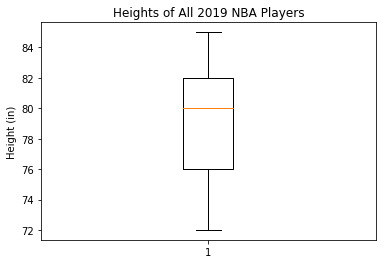

In [13]:
# creates boxplot of player heights in the NBA
fig, ax = plt.subplots()
# plots box plot of data from previous cell
ax.boxplot(top_height_df["Height (in)"])
# sets title
ax.set_title('Heights of All 2019 NBA Players')
# sets y-axis label
ax.set_ylabel('Height (in)')
plt.savefig("Figures/nba 2019 height boxplot.png")
plt.show()


In [14]:
# function to create Linear Regression plots

def regression(x_values, y_values, x_line_placement, y_line_placement, x_label, y_label, title, file_name):
    # Adds the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #stores regression line
    regress_values = x_values * slope + intercept
    # creates the formula of the line that will appear
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plots points
    plt.scatter(x_values,y_values)
    # plots regression line, ”r-“ makes the line a continuous
    plt.plot(x_values,regress_values,"r-")
    # makes the formula appear
    plt.annotate(line_eq,(x_line_placement, y_line_placement),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.savefig("Figures/" + file_name + ".png")
    plt.show()


The r-squared value is: 0.010513050309248836


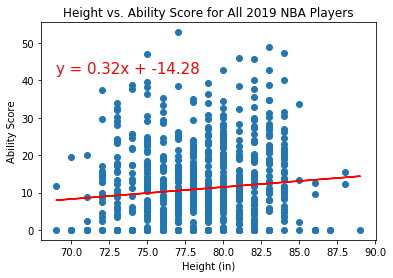

In [60]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of height vs. ability score for all 2019 nba players
regression(height_df["Height (in)"], height_df["Ability Score"], 69, 42, "Height (in)", "Ability Score", "Height vs. Ability Score for All 2019 NBA Players", "height vs. ability score all 2019 nba")


The r-squared value is: 0.004507402780407751


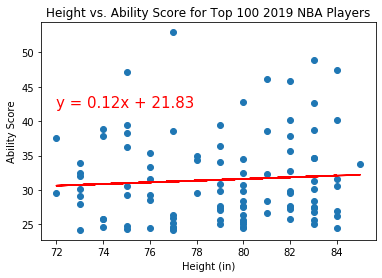

In [61]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of height vs. ability score for top 100 2019 nba players
regression(top_height_df["Height (in)"], top_height_df["Ability Score"], 72, 42, "Height (in)", "Ability Score", "Height vs. Ability Score for Top 100 2019 NBA Players", "height vs. ability score top 2019 nba")


In [62]:
# saves df to csv
output_data_file = "Output csv's/2019 nba stats.csv"
stats_df.to_csv(output_data_file)


In [63]:
# saves csv to df so I don't have to run above cells every time
file_path = os.path.join("Output csv's", "2019 nba stats.csv")
statscsv_df = pd.read_csv(file_path)


In [64]:
# removes any players that have a 0 for ability score because they probably never played (unfortunetly)
ability_df = statscsv_df.loc[statscsv_df["Ability Score"] > 0]
ability_df


,Unnamed: 0,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Points/Game,Assists/Game,Steals/Game,Rebounds/Game,Blocks/Game,Ability Score
0,0,Alex Abrines,26,Palma de Mallorca,Spain,NaN,NaN,NaN,NaN,NaN,"6'6""",5.3,0.6,0.5,1.5,0.2,8.1
1,1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,NaN,NaN,"6'7""",1.7,0.8,0.1,2.5,0.4,5.5
2,2,Jaylen Adams,23,"Elkridge, MD",USA,NaN,NaN,NaN,NaN,NaN,"6'0""",3.2,1.9,0.4,1.8,0.1,7.4
3,3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,NaN,NaN,"6'11""",13.8,1.6,1.5,9.5,1.0,27.4
4,4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,NaN,NaN,"6'9""",8.9,2.2,0.9,7.3,0.8,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,617,Tyler Zeller,30,"Visalia, CA",USA,NaN,NaN,University of North Carolina,NaN,NaN,"7'0""",11.5,0.8,0.2,4.5,0.8,17.8
618,618,Qi Zhou,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7'1""",2.0,0.0,0.0,0.0,0.0,2.0
619,619,Ante Zizic,23,Split,Croatia,NaN,NaN,NaN,NaN,NaN,"6'10""",7.8,0.9,0.2,5.4,0.4,14.7
620,620,Ivica Zubac,23,Mostar,Croatia,NaN,NaN,NaN,NaN,NaN,"7'0""",8.5,0.8,0.2,4.9,0.8,15.2


The r-squared value is: 0.009467628070643894


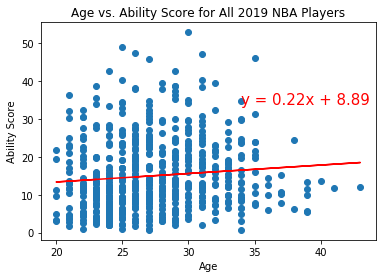

In [65]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. ability score for all 2019 nba players
regression(ability_df["Age"], ability_df["Ability Score"], 34, 34, "Age", "Ability Score", "Age vs. Ability Score for All 2019 NBA Players", "ability score all 2019 nba")


In [66]:
# sorts by ability score- greatest to least
sorted_df = statscsv_df.sort_values("Ability Score", ascending = False)
# deletes unncessary row
del sorted_df['Unnamed: 0']


The r-squared value is: 0.004020767998493001


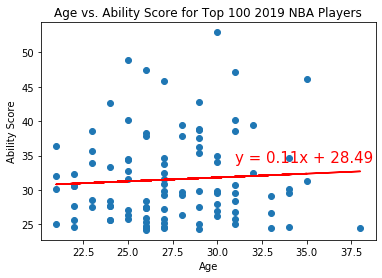

In [67]:
# only takes the top 100 players based on ability score
top_100 = sorted_df.iloc[0:100]
top_100

# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. ability score for top 100 2019 nba players
regression(top_100["Age"], top_100["Ability Score"], 31, 34, "Age", "Ability Score", "Age vs. Ability Score for Top 100 2019 NBA Players", "ability score top 100 2019 nba")


The r-squared value is: 0.002084010247404446


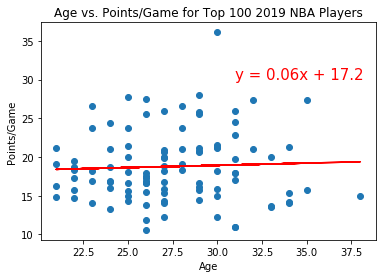

In [68]:
# creates scatter plot of age vs. points/game for top 100 2019 nba players
regression(top_100["Age"], top_100["Points/Game"], 31, 30, "Age", "Points/Game", "Age vs. Points/Game for Top 100 2019 NBA Players", "points top 100 2019 nba")


The r-squared value is: 0.0367480676393909


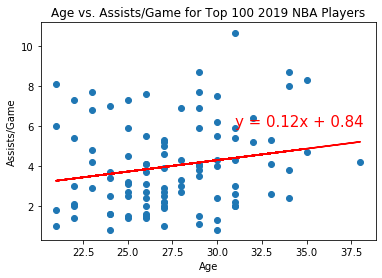

In [69]:
# creates scatter plot of age vs. assists/game for top 100 2019 nba players
regression(top_100["Age"], top_100["Assists/Game"], 31, 6, "Age", "Assists/Game", "Age vs. Assists/Game for Top 100 2019 NBA Players", "assists top 100 2019 nba")


The r-squared value is: 0.006540752135741553


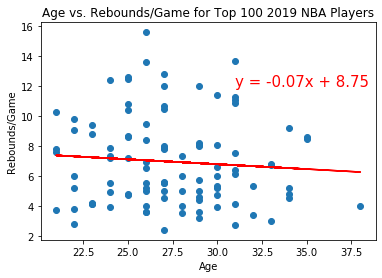

In [70]:
# creates scatter plot of age vs. rebounds/game for top 100 2019 nba players
regression(top_100["Age"], top_100["Rebounds/Game"], 31, 12, "Age", "Rebounds/Game", "Age vs. Rebounds/Game for Top 100 2019 NBA Players", "rebounds top 100 2019 nba")


The r-squared value is: 0.004701746876120729


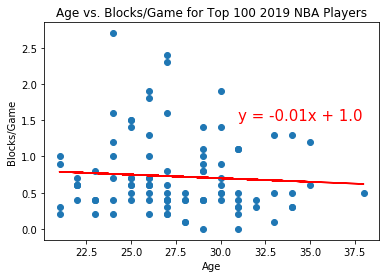

In [71]:
# creates scatter plot of age vs. blocks/game for top 100 2019 nba players
regression(top_100["Age"], top_100["Blocks/Game"], 31, 1.5, "Age", "Blocks/Game", "Age vs. Blocks/Game for Top 100 2019 NBA Players", "blocks top 100 2019 nba")


The r-squared value is: 0.012427968214639856


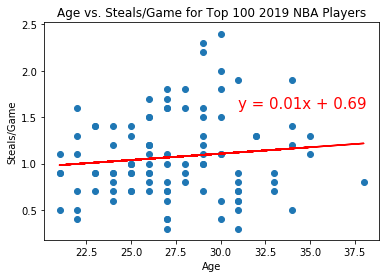

In [72]:
# creates scatter plot of age vs. steals/game for top 100 2019 nba players
regression(top_100["Age"], top_100["Steals/Game"], 31, 1.6, "Age", "Steals/Game", "Age vs. Steals/Game for Top 100 2019 NBA Players", "steals top 100 2019 nba")


The r-squared value is: 0.5880239251984185


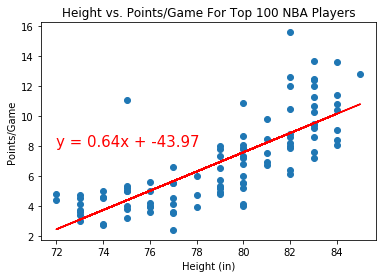

In [73]:
# creates scatter plot of height vs. points/game for top 100 2019 nba players
top_height_df = top_height_df[top_height_df['Points/Game'].notna()]
regression(top_height_df["Height (in)"], top_height_df["Points/Game"], 72, 8, "Height (in)", "Points/Game", "Height vs. Points/Game For Top 100 NBA Players", "height vs. points top 2019 nba")


The r-squared value is: 0.3308596237333154


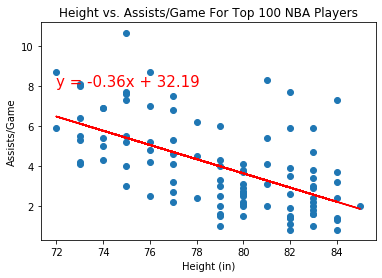

In [74]:
# creates scatter plot of height vs. assists/game for top 100 2019 nba players
top_height_df = top_height_df[top_height_df['Assists/Game'].notna()]
regression(top_height_df["Height (in)"], top_height_df["Assists/Game"], 72, 8, "Height (in)", "Assists/Game", "Height vs. Assists/Game For Top 100 NBA Players", "height vs. assists top 2019 nba")


The r-squared value is: 0.11324236051985086


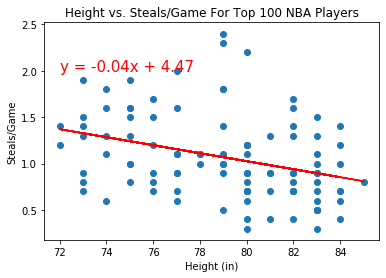

In [75]:
# creates scatter plot of height vs. steals/game for top 100 2019 nba players
top_height_df = top_height_df[top_height_df['Steals/Game'].notna()]
regression(top_height_df["Height (in)"], top_height_df["Steals/Game"], 72, 2, "Height (in)", "Steals/Game", "Height vs. Steals/Game For Top 100 NBA Players", "height vs. steals top 2019 nba")


The r-squared value is: 0.39010195915685175


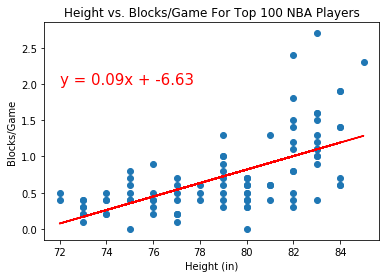

In [76]:
# creates scatter plot of height vs. blocks/game for top 100 2019 nba players
top_height_df = top_height_df[top_height_df['Blocks/Game'].notna()]
regression(top_height_df["Height (in)"], top_height_df["Blocks/Game"], 72, 2, "Height (in)", "Blocks/Game", "Height vs. Blocks/Game For Top 100 NBA Players", "height vs. blocks top 2019 nba")


The r-squared value is: 0.5880239251984185


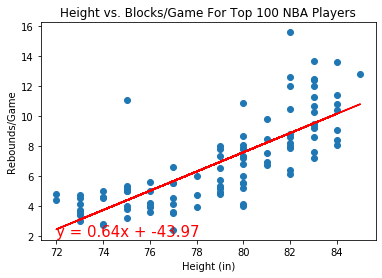

In [18]:
# creates scatter plot of height vs. rebounds/game for top 100 2019 nba players
top_height_df = top_height_df[top_height_df['Rebounds/Game'].notna()]
regression(top_height_df["Height (in)"], top_height_df["Rebounds/Game"], 72, 2, "Height (in)", "Rebounds/Game", "Height vs. Blocks/Game For Top 100 NBA Players", "height vs. rebounds top 2019 nba")


In [ ]:
# removes any rows where birth cirt and country are NaN
birth_df = statscsv_df[statscsv_df['Birth City'].notna()]
birth_df = birth_df[birth_df['Birth Country'].notna()]
birth_df


In [ ]:
# itterate through every index and row of df
for index, row in birth_df.iterrows():
# sets target place to the name of each player's birth location
    target_place = "{0},{1}".format(row['Birth City'], row['Birth Country'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the college, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each location to the df
        birth_df.loc[index, 'Birth Lat'] = results["lat"]
        birth_df.loc[index, 'Birth Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of town... skipping")
        
birth_df
    

In [ ]:
# removes any rows where birth cities/countries lat/lng were NaN
birth_df = birth_df[birth_df['Birth Lat'].notna()]
birth_df = birth_df[birth_df['Birth Lng'].notna()]
birth_df


In [ ]:
# saves df to csv
output_data_file2 = "Output csv's/birth nba 2019.csv"
birth_df.to_csv(output_data_file2)


In [2]:
# saves csv to df so I don't have to run above cells every time
file_path2 = os.path.join("Output csv's", "birth nba 2019.csv")
birth_df = pd.read_csv(file_path2)


In [3]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# creates heat map of birth locations of NBA players of 2019
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(birth_df[["Birth Lat", "Birth Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [7]:
# removes any rows were college is NaN
college_df = statscsv_df[statscsv_df['College'].notna()]
college_df


,Unnamed: 0,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Ability Score
1,1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,NaN,NaN,"6'7""",5.5
3,3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,NaN,NaN,"6'11""",27.4
4,4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,NaN,NaN,"6'9""",20.1
7,7,LaMarcus Aldridge,34,"Dallas, TX",USA,NaN,NaN,University of Texas at Austin,NaN,NaN,"6'11""",34.7
10,10,Jarrett Allen,21,"Austin, TX",USA,NaN,NaN,University of Texas at Austin,NaN,NaN,"6'11""",22.7
...,...,...,...,...,...,...,...,...,...,...,...,...
876,876,Nate Wolters,28,"St. Cloud, MN",USA,NaN,NaN,South Dakota State University,NaN,NaN,NaN,0.0
877,877,Kenny Wooten,21,"Manteca, CA",USA,NaN,NaN,Oregon,NaN,NaN,"6'8""",0.0
878,878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,NaN,NaN,"6'10""",0.0
879,879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,NaN,NaN,"6'0""",0.0


In [8]:
# itterate through every index and row of df
for index, row in college_df.iterrows():
# sets target place to the name of each player's birth location
    target_place = "{0}".format(row['College'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the college, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each location to the df
        college_df.loc[index, 'College Lat'] = results["lat"]
        college_df.loc[index, 'College Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of college... skipping")
        
college_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Ability Score
1,1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,31.546913,-97.121100,"6'7""",5.5
3,3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,40.444353,-79.960835,"6'11""",27.4
4,4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,38.030651,-84.503970,"6'9""",20.1
7,7,LaMarcus Aldridge,34,"Dallas, TX",USA,NaN,NaN,University of Texas at Austin,30.284918,-97.734057,"6'11""",34.7
10,10,Jarrett Allen,21,"Austin, TX",USA,NaN,NaN,University of Texas at Austin,30.284918,-97.734057,"6'11""",22.7
...,...,...,...,...,...,...,...,...,...,...,...,...
876,876,Nate Wolters,28,"St. Cloud, MN",USA,NaN,NaN,South Dakota State University,44.319242,-96.783450,NaN,0.0
877,877,Kenny Wooten,21,"Manteca, CA",USA,NaN,NaN,Oregon,43.804133,-120.554201,"6'8""",0.0
878,878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,35.904912,-79.046913,"6'10""",0.0
879,879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,40.716687,-73.599396,"6'0""",0.0


In [9]:
# removes any rows where college lat/lng were NaN
college_df = college_df[college_df['College Lat'].notna()]
college_df = college_df[college_df['College Lng'].notna()]
college_df


,Unnamed: 0,Name,Age,Birth City,Birth Country,Birth Lat,Birth Lng,College,College Lat,College Lng,Height (in),Ability Score
1,1,Quincy Acy,29,"Tyler, TX",USA,NaN,NaN,Baylor University,31.546913,-97.121100,"6'7""",5.5
3,3,Steven Adams,26,Rotorua,New Zealand,NaN,NaN,University of Pittsburgh,40.444353,-79.960835,"6'11""",27.4
4,4,Bam Adebayo,22,"Newark, NJ",USA,NaN,NaN,University of Kentucky,38.030651,-84.503970,"6'9""",20.1
7,7,LaMarcus Aldridge,34,"Dallas, TX",USA,NaN,NaN,University of Texas at Austin,30.284918,-97.734057,"6'11""",34.7
10,10,Jarrett Allen,21,"Austin, TX",USA,NaN,NaN,University of Texas at Austin,30.284918,-97.734057,"6'11""",22.7
...,...,...,...,...,...,...,...,...,...,...,...,...
876,876,Nate Wolters,28,"St. Cloud, MN",USA,NaN,NaN,South Dakota State University,44.319242,-96.783450,NaN,0.0
877,877,Kenny Wooten,21,"Manteca, CA",USA,NaN,NaN,Oregon,43.804133,-120.554201,"6'8""",0.0
878,878,Brandan Wright,32,"Nashville, TN",USA,NaN,NaN,University of North Carolina,35.904912,-79.046913,"6'10""",0.0
879,879,Justin Wright-Foreman,22,"Laurelton, NY",USA,NaN,NaN,Hofstra,40.716687,-73.599396,"6'0""",0.0


In [10]:
# saves df to csv
output_data_file3 = "Output csv's/college nba 2019.csv"
college_df.to_csv(output_data_file3)


In [11]:
# saves csv to df so I don't have to run above cells every time
file_path3 = os.path.join("Output csv's", "college nba 2019.csv")
college_df = pd.read_csv(file_path3)


In [12]:
gmaps.configure(api_key=gkey)

# creates heat map of colleges of NBA players of 2019
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(college_df[["College Lat", "College Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))